<a href="https://colab.research.google.com/github/NanjuJung/population-projections/blob/main/Population_projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Standardizing the size of all images
mpl.rcParams['figure.figsize'] = (15,9)
mpl.rcParams['font.size'] = 15

In [ ]:
# Reading the dataset
df1 = pd.read_csv('/content/202106_생활인구평균.csv')
df2 = pd.read_csv('/content/202206_생활인구평균.csv')
df3 = pd.read_csv('/content/202306_생활인구평균.csv')
df1.head()
df2.head()
df3.head()

,집계구코드,총생활인구수_01,총생활인구수_02,총생활인구수_03,총생활인구수_04,총생활인구수_05,총생활인구수_06,총생활인구수_07,총생활인구수_08,총생활인구수_09,...,총생활인구수_21,총생활인구수_22,총생활인구수_23,총생활인구수_24,총생활인구수_25,총생활인구수_26,총생활인구수_27,총생활인구수_28,총생활인구수_29,총생활인구수_30
0,1101053010001,16.387213,14.561104,14.163717,16.701087,20.283942,16.006458,21.931858,19.006775,19.595688,...,20.411117,20.052150,20.928967,17.594213,20.829221,15.155025,20.563588,22.703646,18.281625,17.815392
1,1101053010002,908.372379,929.812946,886.078192,830.574283,822.872258,787.983187,870.190983,911.866850,890.540421,...,938.612833,913.296371,922.752888,872.035846,873.232483,889.458638,931.445904,919.464675,894.596758,901.997767
2,1101053010003,1347.912075,1342.177404,1351.183183,1280.008800,1232.413079,1222.892121,1292.647796,1347.960342,1319.816921,...,1322.042208,1317.244358,1307.542017,1292.522404,1285.908192,1269.180571,1291.609667,1300.911804,1268.573450,1257.985542
3,1101053010004,2289.250842,2295.470142,2003.959996,1699.812746,2044.707792,1717.593787,2011.362388,2170.584483,2184.927708,...,2129.319442,2173.592058,2182.525042,1902.722025,1500.526517,1910.290079,2028.249775,2173.408171,1881.379779,2130.009079
4,1101053010005,1447.757392,1417.756892,1410.925162,1304.619879,1353.765792,1315.970538,1284.550083,1372.589046,1389.605392,...,1295.443096,1390.093396,1368.629300,1312.813700,1092.744908,1176.858113,1274.144450,1341.232892,1176.508954,1356.912308


In [ ]:
import pandas as pd
import re

# 데이터 로드
df1 = pd.read_csv('/content/202106_생활인구평균.csv')
df2 = pd.read_csv('/content/202206_생활인구평균.csv')
df3 = pd.read_csv('/content/202306_생활인구평균.csv')

# 열 이름에서 숫자만 남기고 나머지 제거하는 함수
def keep_only_numbers(column_name):
    return re.sub(r'\D', '', column_name)

# 각 데이터프레임에 대해 열 이름 변경
df1.columns = [keep_only_numbers(col) if col != '집계구코드' else col for col in df1.columns]
df2.columns = [keep_only_numbers(col) if col != '집계구코드' else col for col in df2.columns]
df3.columns = [keep_only_numbers(col) if col != '집계구코드' else col for col in df3.columns]

# 각 데이터프레임을 피벗하는 함수
def pivot_dataframe(df, prefix):
    # '집계구코드'를 인덱스로 설정
    df.set_index('집계구코드', inplace=True)
    # 데이터프레임을 피벗하여 행과 열을 반대로
    df_pivoted = df.T
    # 인덱스를 숫자로 변환 (예: '01' -> 1)
    df_pivoted.index = df_pivoted.index.astype(int)
    # 인덱스를 'date'로 변경
    df_pivoted.index.name = 'date'
    # 인덱스 정렬
    df_pivoted.sort_index(inplace=True)
    # 행 이름 앞에 prefix 추가
    df_pivoted.index = prefix + df_pivoted.index.astype(str)
    return df_pivoted

# 각 데이터프레임 피벗 및 행 이름에 prefix 추가
df1_pivoted = pivot_dataframe(df1, '202106_')
df2_pivoted = pivot_dataframe(df2, '202206_')
df3_pivoted = pivot_dataframe(df3, '202306_')

# 피벗된 데이터프레임 확인
print("df1_pivoted:")
print(df1_pivoted.head())
print("\ndf2_pivoted:")
print(df2_pivoted.head())
print("\ndf3_pivoted:")
print(df3_pivoted.head())


df1_pivoted:
집계구코드     1101053010001  1101053010002  1101053010003  1101053010004  \
date                                                                   
202106_1     364.934046    1823.946775    1810.464733    1512.295358   
202106_2     367.550804    1824.776058    1829.415550    1571.269742   
202106_3     379.912392    1730.796208    1714.431792    1453.543138   
202106_4     373.139675    1854.844729    1845.056158    1541.249763   
202106_5     422.068050    1845.140700    1904.755017    1418.877650   

집계구코드     1101053010005  1101053010006  1101053020001  1101053020002  \
date                                                                   
202106_1    1172.605950     404.587950    1815.435363   11451.179663   
202106_2    1212.670063     405.062150    1896.306821   11816.819938   
202106_3    1134.253650     413.029046    1871.358425   11855.407858   
202106_4    1190.337946     411.131400    1845.285129   11652.895171   
202106_5    1139.338492     409.123742     978.478

In [ ]:
import pandas as pd

# 데이터 로드 및 피벗 (앞서 제공한 코드 사용)
def keep_only_numbers(column_name):
    return re.sub(r'\D', '', column_name)

def pivot_dataframe(df, prefix):
    df.set_index('집계구코드', inplace=True)
    df_pivoted = df.T
    df_pivoted.index = df_pivoted.index.astype(int)
    df_pivoted.index.name = 'date'
    df_pivoted.sort_index(inplace=True)
    df_pivoted.index = prefix + df_pivoted.index.astype(str)
    df_pivoted.reset_index(inplace=True)
    df_pivoted.rename(columns={'index': '집계구코드'}, inplace=True)
    return df_pivoted

# 데이터 로드
df1 = pd.read_csv('/content/202106_생활인구평균.csv')
df2 = pd.read_csv('/content/202206_생활인구평균.csv')
df3 = pd.read_csv('/content/202306_생활인구평균.csv')

# 열 이름 정리
df1.columns = [keep_only_numbers(col) if col != '집계구코드' else col for col in df1.columns]
df2.columns = [keep_only_numbers(col) if col != '집계구코드' else col for col in df2.columns]
df3.columns = [keep_only_numbers(col) if col != '집계구코드' else col for col in df3.columns]

# 피벗
df1_pivoted = pivot_dataframe(df1, '202106_')
df2_pivoted = pivot_dataframe(df2, '202206_')
df3_pivoted = pivot_dataframe(df3, '202306_')

# 데이터프레임 병합
# 우선 df1_pivoted와 df2_pivoted를 병합
merged_df = pd.concat([df1_pivoted, df2_pivoted, df3_pivoted], ignore_index=True)

# 병합된 데이터프레임 확인
print(merged_df.head())

# 병합된 데이터프레임을 CSV 파일로 저장
merged_df.to_csv('/content/merged_population_data.csv', index=False)


집계구코드      date  1101053010001  1101053010002  1101053010003  1101053010004  \
0      202106_1     364.934046    1823.946775    1810.464733    1512.295358   
1      202106_2     367.550804    1824.776058    1829.415550    1571.269742   
2      202106_3     379.912392    1730.796208    1714.431792    1453.543138   
3      202106_4     373.139675    1854.844729    1845.056158    1541.249763   
4      202106_5     422.068050    1845.140700    1904.755017    1418.877650   

집계구코드  1101053010005  1101053010006  1101053020001  1101053020002  \
0        1172.605950     404.587950    1815.435363   11451.179663   
1        1212.670063     405.062150    1896.306821   11816.819938   
2        1134.253650     413.029046    1871.358425   11855.407858   
3        1190.337946     411.131400    1845.285129   11652.895171   
4        1139.338492     409.123742     978.478750    6192.444038   

집계구코드  1101053020003  ...  1125074030010  1125074030011  1125074030012  \
0         357.304196  ...     736.85

In [ ]:
from google.colab import files
files.download('/content/merged_population_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('/content/merged_population_data.csv')

# 날짜 형식 변환 함수
def convert_to_date(date_str):
    try:
        # "202106_1" -> "2021-06-01"
        year = date_str[:4]
        month = date_str[4:6]
        day = date_str[7:]
        return f"{year}-{month}-{day}"
    except:
        return pd.NaT  # 변환 실패 시 NaT 반환

# 날짜 변환 적용
data['date'] = data['date'].apply(convert_to_date)
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 날짜 변환 후 인덱스 설정 및 정렬
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# 결측치 확인
print("결측치 개수:")
print(data.isna().sum())

# 각 행의 평균으로 결측치 대체
data_filled = data.apply(lambda row: row.fillna(row.mean()), axis=1)

# 결측치 처리 후 데이터 확인
print("결측치 처리 후 개수:")
print(data_filled.isna().sum())

# 결측치 처리된 데이터를 CSV 파일로 저장 (원하는 경우)
data_filled.to_csv('/content/merged_population_data_filled.csv')


결측치 개수:
1101053010001    0
1101053010002    0
1101053010003    0
1101053010004    0
1101053010005    0
                ..
1125074030501    1
1125074030701    1
1125074030801    1
1125074031101    1
1125074033301    1
Length: 19153, dtype: int64
결측치 처리 후 개수:
1101053010001    0
1101053010002    0
1101053010003    0
1101053010004    0
1101053010005    0
                ..
1125074030501    0
1125074030701    0
1125074030801    0
1125074031101    0
1125074033301    0
Length: 19153, dtype: int64


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정 (데이터 개수보다 작은 값으로 설정)
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)


NameError: name 'pd' is not defined

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# 예시 데이터 로드
data = pd.read_csv('/content/merged_population_data_filled.csv')

# 데이터 준비
# X와 y를 준비해야 합니다. 예를 들어, X는 입력 데이터, y는 타겟 데이터입니다.
# X와 y는 데이터 전처리 후 준비됩니다.

# 여기서 X는 시퀀스 데이터로 변환된 입력 데이터
# y는 각 시퀀스에 대한 타겟 값입니다.
# X와 y는 시퀀스 길이와 특성 수를 고려하여 준비합니다.

# 예시로 랜덤 데이터 생성 (실제 데이터로 교체해야 함)
num_samples = 61
window = 29
num_features = 19153
X = np.random.rand(num_samples, window, num_features)
y = np.random.rand(num_samples, num_features)

# 훈련 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(units=y_train.shape[1]))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# 모델 요약
model.summary()

# 모델 훈련
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               9872384   
                                                                 
 dense (Dense)               (None, 19153)             2470737   
                                                                 
Total params: 12343121 (47.09 MB)
Trainable params: 12343121 (47.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
2/2 [==============================] - 6s 2s/step - loss: 0.3339 - val_loss: 0.3285
Epoch 2/30
2/2 [==============================] - 3s 2s/step - loss: 0.3281 - val_loss: 0.3196
Epoch 3/30
2/2 [==============================] - 4s 3s/step - loss: 0.3179 - val_loss: 0.3031
Epoch 4/30
2/2 [==============================] - 3s 2s/step - loss: 0.2999 - val_loss: 0.2802
Epoch 5/30
2/2 [==============

Text(0, 0.5, 'Cost')

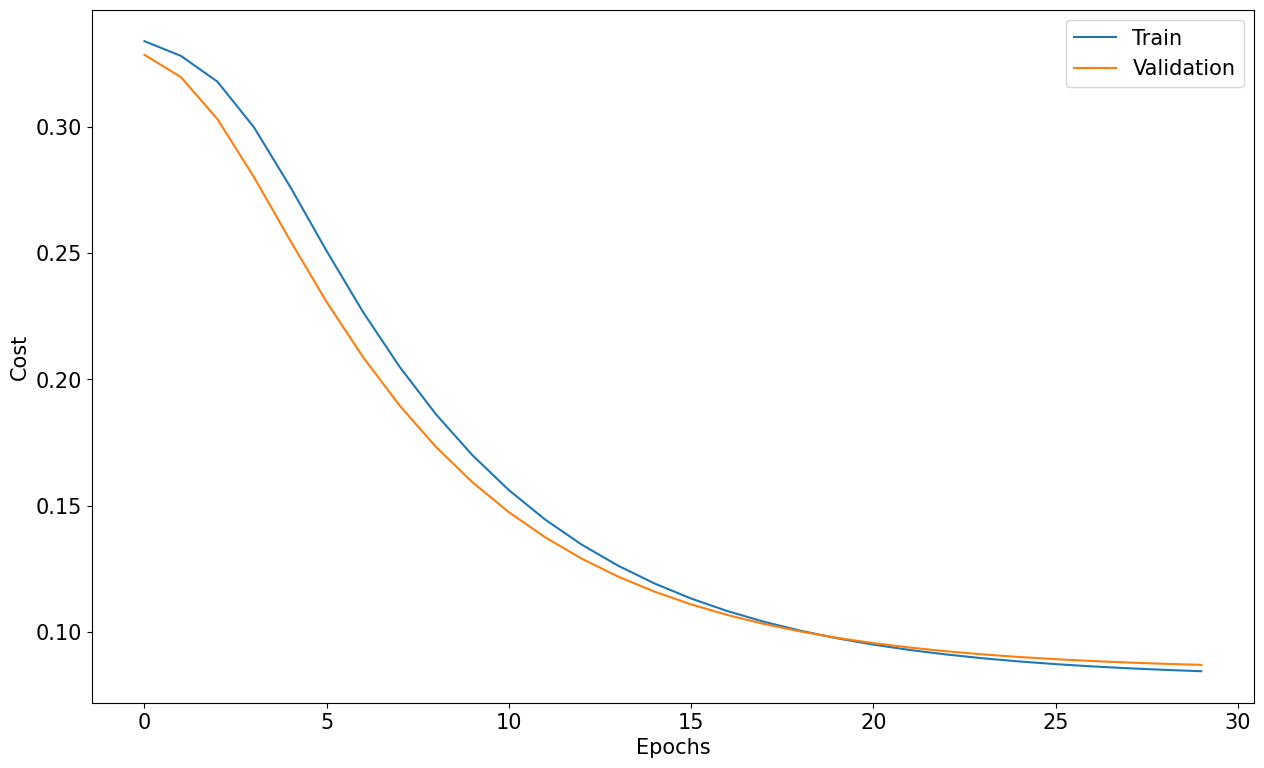

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Cost')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정 (데이터 개수보다 작은 값으로 설정)
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)

# 모델 정의
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=y_train.shape[1]))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# 모델 요약
model.summary()

# 모델 훈련
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

# 예측 결과 생성
y_predicted = model.predict(X_test)

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17,20))

    g1 = grid.add_subplot(2,1,1)
    g2 = grid.add_subplot(2,1,2)

    sns.lineplot(x=x_date[window:len(y_train) + window], y=y_train[:,0], label='Train', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:,0], label='Test', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted[:,0], label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:,0], label='Test', ax=g2)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted[:,0], label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

# 함수 호출
results_chart(y_predicted, y_test, y_train, x_date, SEQ_LENGTH - 1)


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               9872384   
                                                                 
 dense_3 (Dense)             (None, 19153)             2470737   
                                                                 
Total params: 12343121 (47.09 MB)
Trainable params: 12343121 (47.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 8s 2s/step - loss: 0.2715 - val_loss: 0.2692
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 0.2665 - val_loss: 0.2626
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 0.2585 - val_loss: 0.2506
Epoch 4/50
2/2 [==============================] - 5s 3s/s

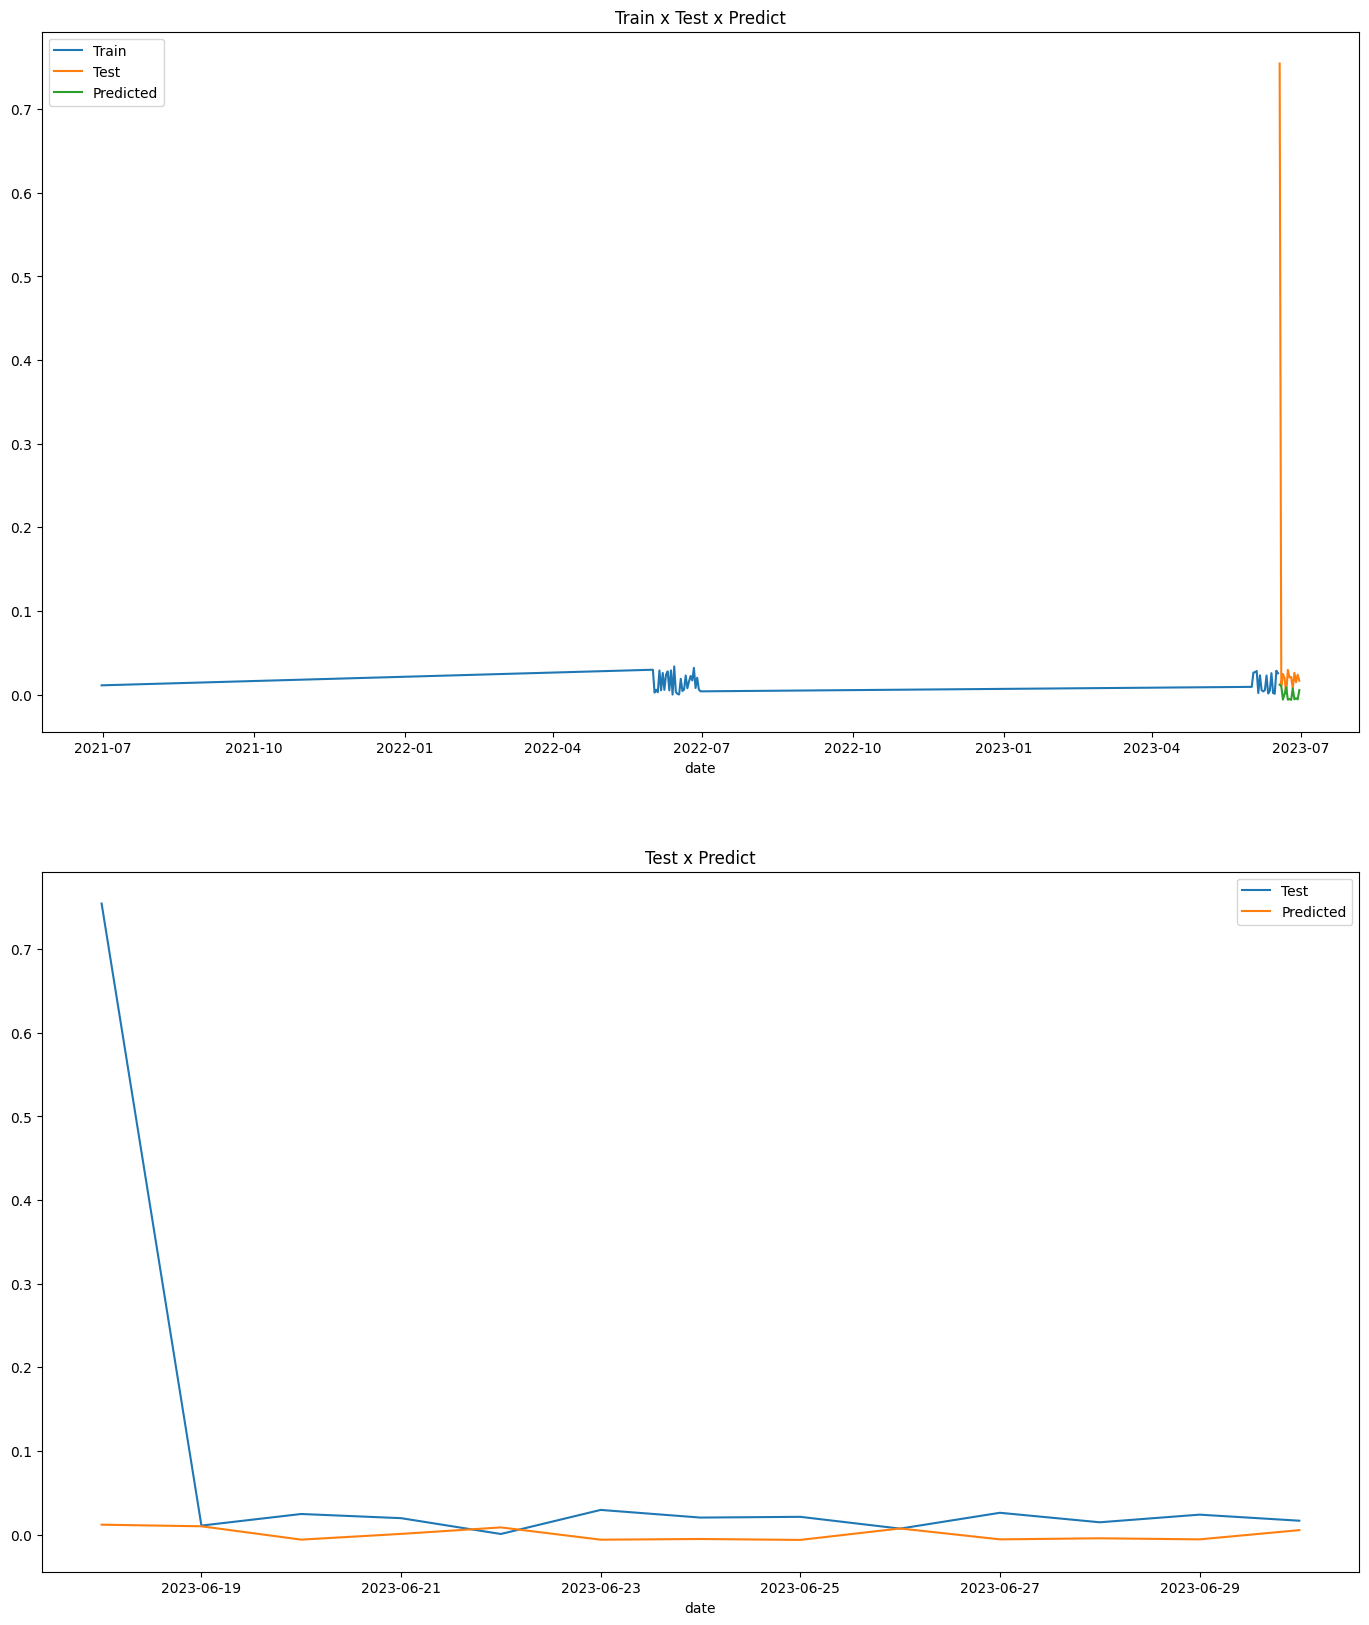

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정 (데이터 개수보다 작은 값으로 설정)
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)

# 모델 정의
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=y_train.shape[1]))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# 모델 요약
model.summary()

# 모델 훈련
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

# 예측 결과 생성
y_predicted = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4e}')
print(f'Mean Absolute Error: {mae:.4e}')
print(f'Root Mean Squared Error: {rmse:.4e}')

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17,20))

    g1 = grid.add_subplot(2,1,1)
    g2 = grid.add_subplot(2,1,2)

    sns.lineplot(x=x_date[window:len(y_train) + window], y=y_train[:,0], label='Train', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:,0], label='Test', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted[:,0], label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:,0], label='Test', ax=g2)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted[:,0], label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

# 함수 호출
results_chart(y_predicted, y_test, y_train, x_date, SEQ_LENGTH - 1)


In [ ]:

# 예측 결과를 원래 스케일로 역변환
y_predicted_inverse = scaler.inverse_transform(y_predicted)
y_test_inverse = scaler.inverse_transform(y_test)

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 집계구 코드별로 예측된 인구수 출력
gu_code_columns = data_filled.columns
predicted_population = pd.DataFrame(data=y_predicted_inverse, columns=gu_code_columns)

# 향후 예측된 인구수 출력
print(predicted_population.head())

   1101053010001  1101053010002  1101053010003  1101053010004  1101053010005  \
0      12.286960     872.168335    1296.617554    1987.240723    1329.625610   
1      12.588168     873.281067    1298.656860    1988.708618    1333.166992   
2      15.521202     871.669006    1293.660156    1998.776367    1329.893555   
3      12.704752     872.902893    1298.695923    1989.578491    1333.034302   
4      11.350179     874.344727    1300.711670    1984.771973    1335.080200   

   1101053010006  1101053020001  1101053020002  1101053020003  1101053020004  \
0     351.086151    2244.618652   11279.375000      59.076584    2901.846680   
1     351.840088    2255.043457   11341.809570      59.268818    2918.390625   
2     349.995880    2253.836426   11330.148438      60.887901    2926.474121   
3     351.736176    2254.833740   11343.221680      59.408287    2920.991943   
4     352.516327    2255.159668   11345.238281      58.832497    2916.687988   

   ...  1125074030010  1125074030011  

In [ ]:

# 예측 결과를 CSV 파일로 저장
predicted_population.to_csv('/content/predicted_population.csv', index=False)
print("CSV 파일 저장 완료: /content/predicted_population.csv")

CSV 파일 저장 완료: /content/predicted_population.csv


SVR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정 (데이터 개수보다 작은 값으로 설정)
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)

# 데이터를 2차원 배열로 변환
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


print("X_train_reshaped 형태:", X_train_reshaped.shape)
print("y_train 형태:", y_train.shape)


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)
X_train_reshaped 형태: (48, 555437)
y_train 형태: (48, 19153)


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)
훈련 레이블 형태: (48, 19153)
테스트 레이블 형태: (13, 19153)
Mean Squared Error: 0.0419
Mean Absolute Error: 0.0630
Root Mean Squared Error: 0.2047


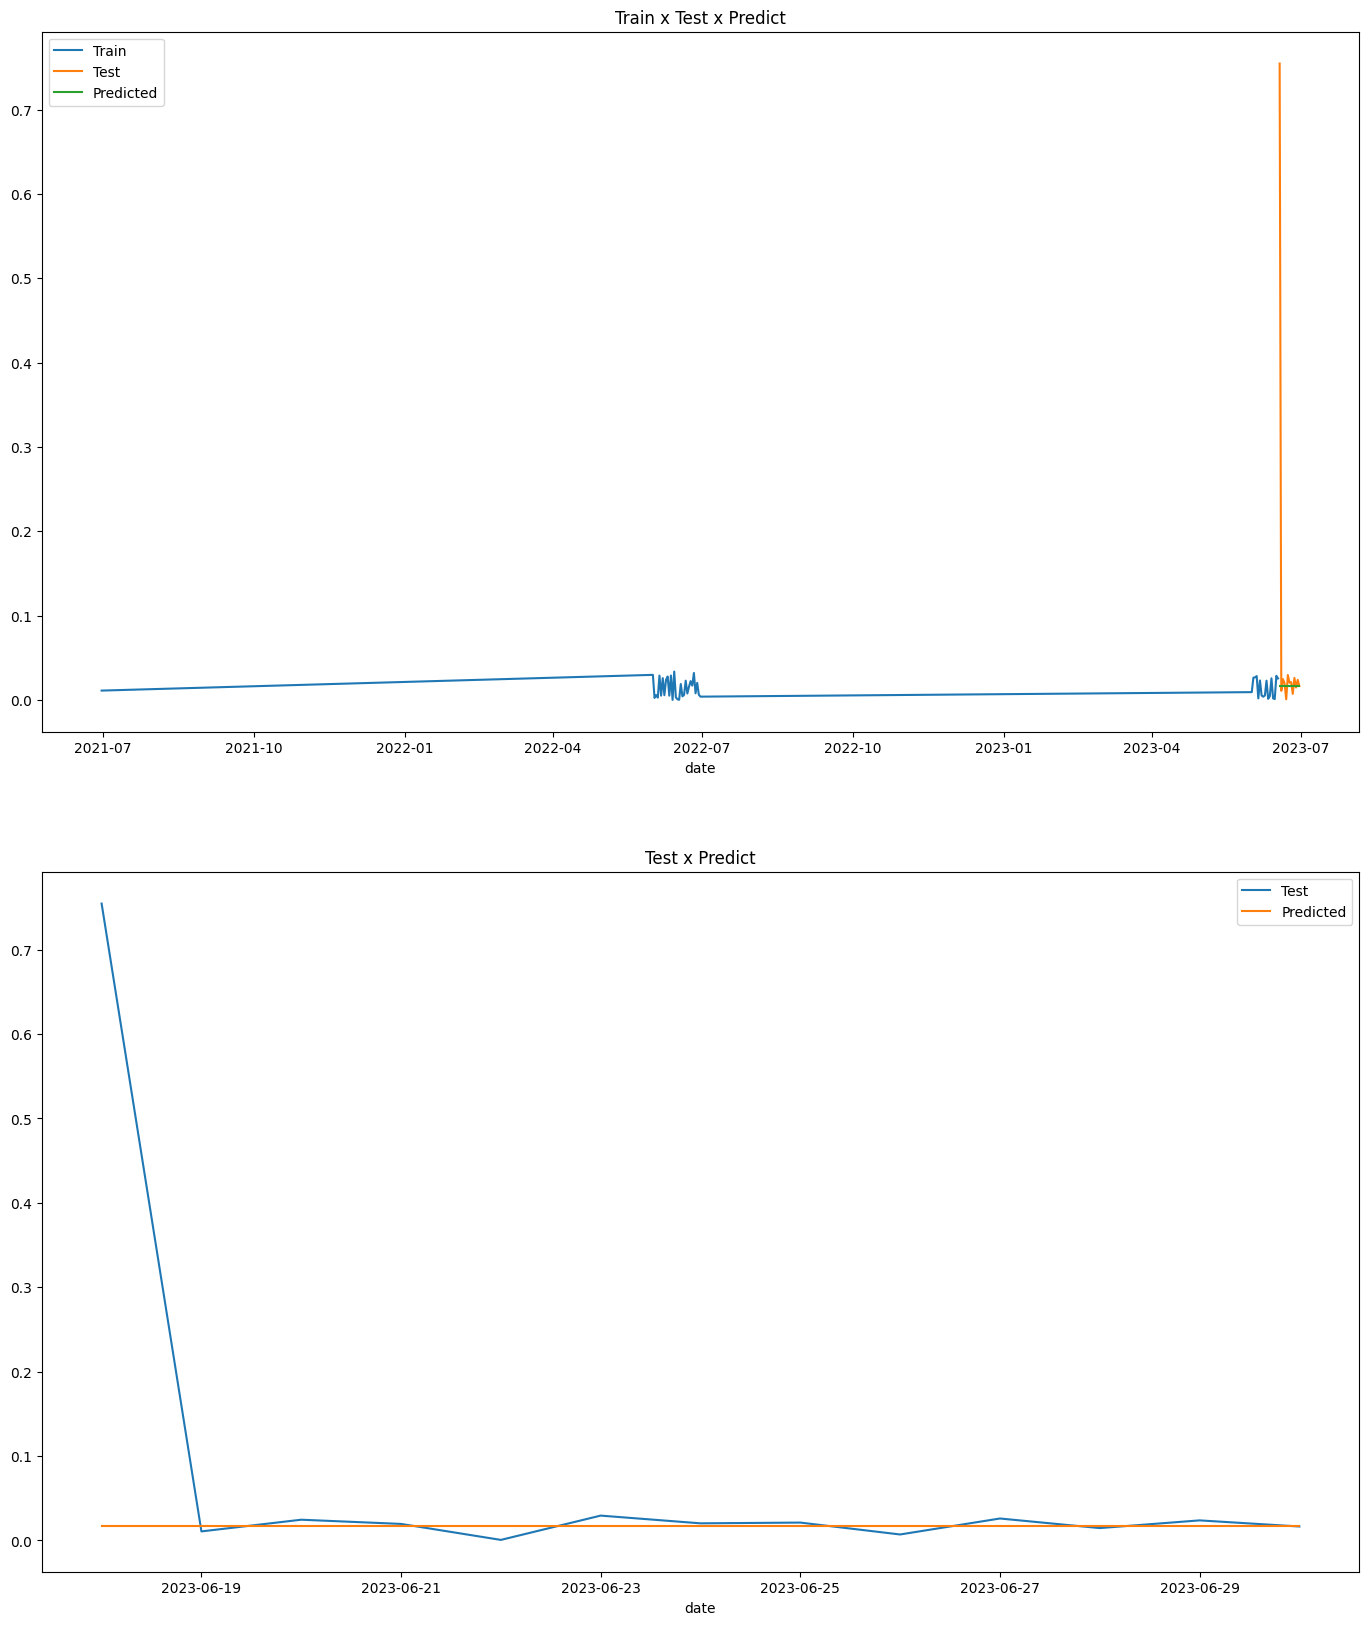

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정 (데이터 개수보다 작은 값으로 설정)
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)
print("훈련 레이블 형태:", y_train.shape)
print("테스트 레이블 형태:", y_test.shape)

# 데이터를 2차원 배열로 변환
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# y_train, y_test는 (샘플 수, 피쳐 수) 형태에서 (샘플 수,) 형태로 변환
# 단일 피쳐만 예측한다고 가정
y_train_reshaped = y_train[:, 0]  # 첫 번째 피쳐만 선택
y_test_reshaped = y_test[:, 0]    # 첫 번째 피쳐만 선택

# SVR 모델 정의 및 훈련
model_svr = SVR().fit(X_train_reshaped, y_train_reshaped)

# 예측 결과 생성
y_predicted = model_svr.predict(X_test_reshaped)

# 평가 지표 계산 (스케일된 상태에서)
mse = mean_squared_error(y_test_reshaped, y_predicted)
mae = mean_absolute_error(y_test_reshaped, y_predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17,20))

    g1 = grid.add_subplot(2,1,1)
    g2 = grid.add_subplot(2,1,2)

    sns.lineplot(x=x_date[window:len(y_train) + window], y=y_train[:, 0], label='Train', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:, 0], label='Test', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted, label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:, 0], label='Test', ax=g2)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted, label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

# 예측 결과 시각화
results_chart(y_predicted, y_test, y_train, x_date, SEQ_LENGTH - 1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from concurrent.futures import ThreadPoolExecutor

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
gu_code_columns = data_filled.columns  # 집계구 코드들 (열 이름들)
num_features = len(gu_code_columns)

# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 시퀀스 길이 설정
SEQ_LENGTH = min(30, len(scaled_data))

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터를 2차원 배열로 변환
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# 예측 결과 저장을 위한 DataFrame
predicted_population = pd.DataFrame(index=data_filled.index[-len(y_test):], columns=gu_code_columns)

def process_gu_code(gu_code):
    # y_train과 y_test는 (샘플 수, 피쳐 수) 형태에서 (샘플 수,) 형태로 변환
    y_train_reshaped = y_train[:, gu_code_columns.get_loc(gu_code)]
    y_test_reshaped = y_test[:, gu_code_columns.get_loc(gu_code)]

    # SVR 모델 정의 및 훈련
    model_svr = SVR()
    model_svr.fit(X_train_reshaped, y_train_reshaped)

    # 예측 결과 생성
    y_predicted = model_svr.predict(X_test_reshaped)

    # 역변환
    y_predicted_reshaped = y_predicted.reshape(-1, 1)
    scaler_y = MinMaxScaler()
    scaler_y.fit(data_filled[[gu_code]])

    y_predicted_inverse = scaler_y.inverse_transform(y_predicted_reshaped)

    return gu_code, y_predicted_inverse.flatten()

# 병렬 처리로 모든 집계구 코드에 대해 예측 수행
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_gu_code, gu_code) for gu_code in gu_code_columns]
    for future in futures:
        gu_code, y_predicted_inverse = future.result()
        predicted_population[gu_code] = y_predicted_inverse

# 예측 결과를 CSV 파일로 저장
predicted_population.to_csv('/content/predicted_population.csv')

# 예측 결과 출력
print("예측된 인구수:")
print(predicted_population.head())


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)
훈련 레이블 형태: (48, 19153)
테스트 레이블 형태: (13, 19153)
Mean Squared Error: 4.2788e-02
Mean Absolute Error: 6.2588e-02
Root Mean Squared Error: 2.0685e-01


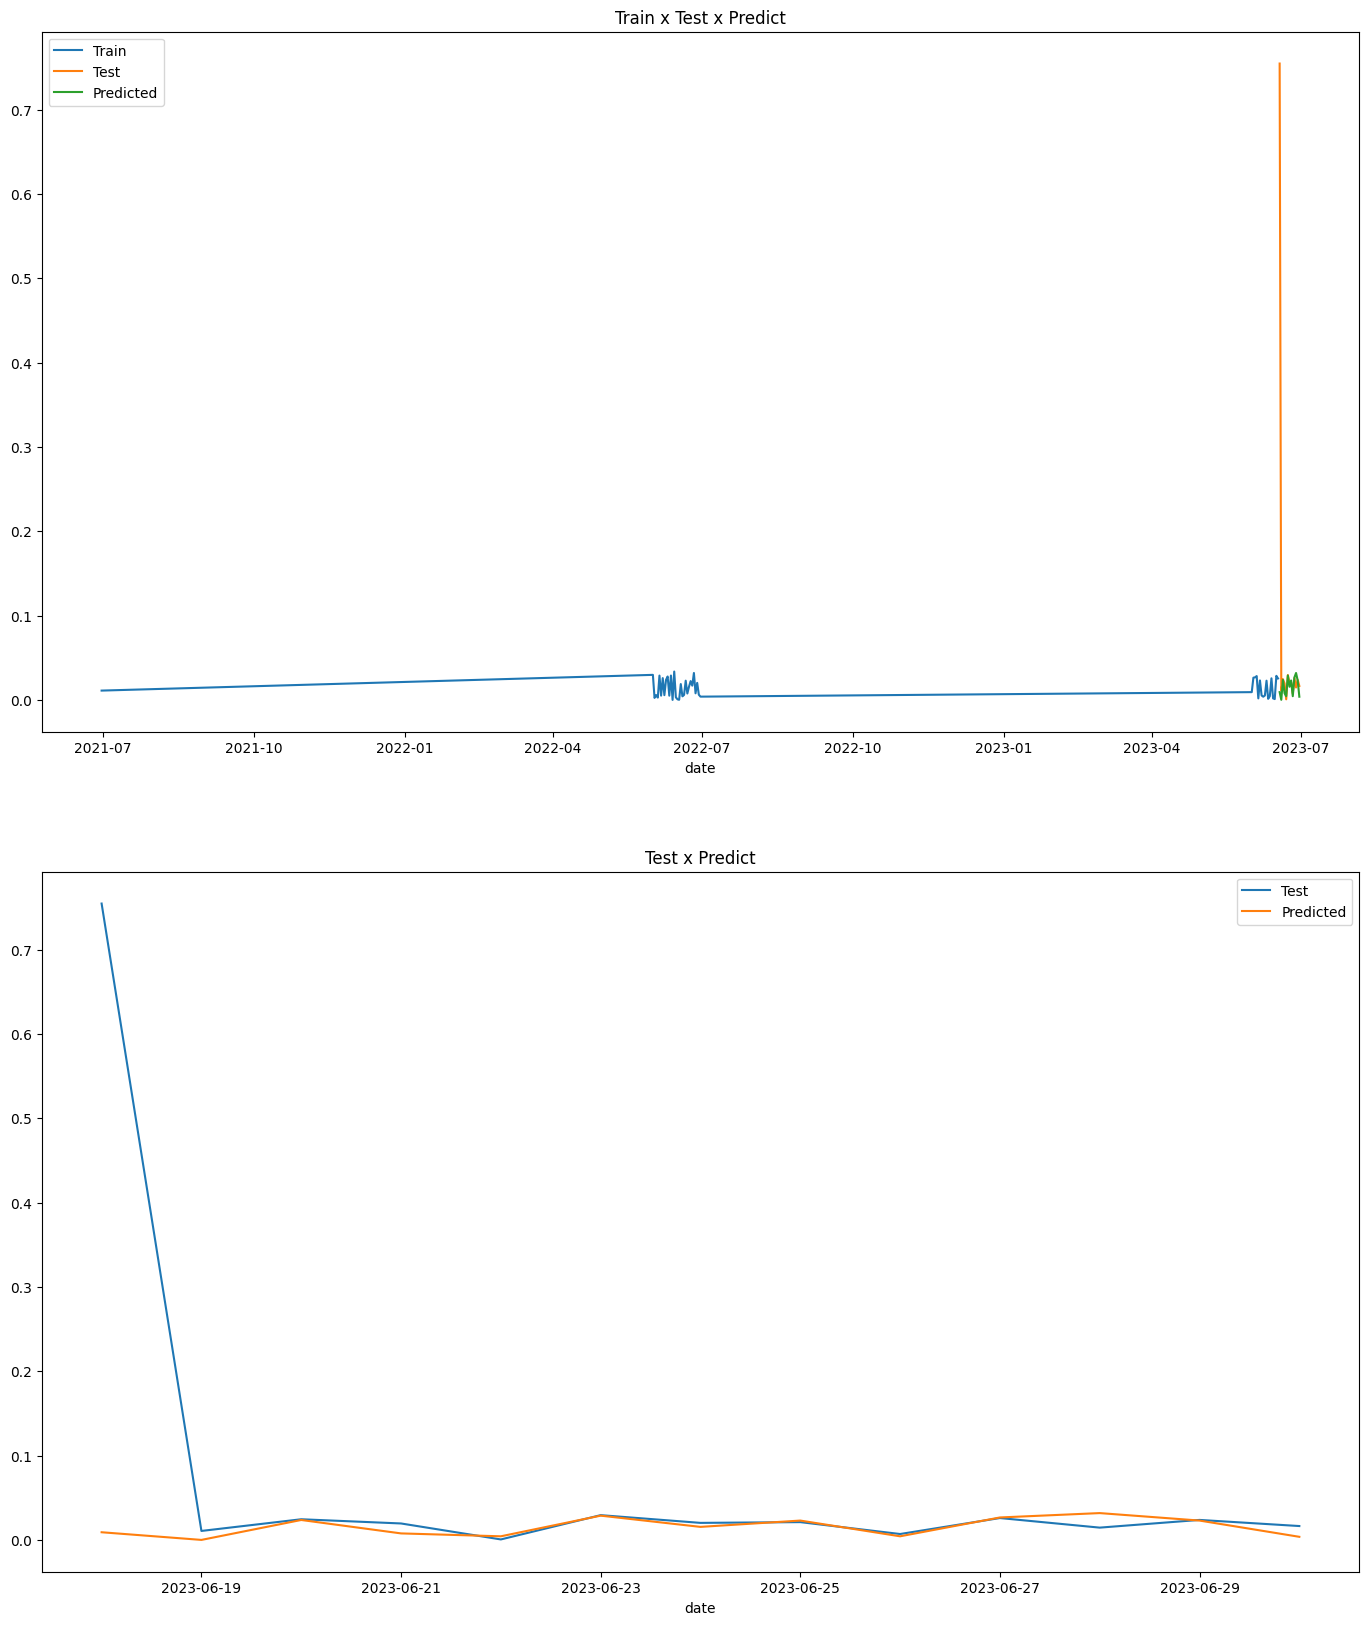

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)
print("훈련 레이블 형태:", y_train.shape)
print("테스트 레이블 형태:", y_test.shape)

# 데이터 2차원 배열로 변환
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# 레이블 데이터 1D 배열로 변환
y_train_reshaped = y_train[:, 0]
y_test_reshaped = y_test[:, 0]

# DecisionTreeRegressor 모델 정의 및 훈련
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train_reshaped, y_train_reshaped)

# 예측 결과 생성
y_predicted = model_decision_tree.predict(X_test_reshaped)

# 평가 지표 계산
mse = mean_squared_error(y_test_reshaped, y_predicted)
mae = mean_absolute_error(y_test_reshaped, y_predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4e}')
print(f'Mean Absolute Error: {mae:.4e}')
print(f'Root Mean Squared Error: {rmse:.4e}')

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17, 20))

    # 날짜와 데이터 인덱스 맞추기
    train_dates = x_date[window:len(y_train) + window]
    test_dates = x_date[len(y_train) + window:]

    g1 = grid.add_subplot(2, 1, 1)
    g2 = grid.add_subplot(2, 1, 2)

    sns.lineplot(x=train_dates, y=y_train, label='Train', ax=g1)
    sns.lineplot(x=test_dates, y=y_test, label='Test', ax=g1)
    sns.lineplot(x=test_dates, y=y_predicted, label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=test_dates, y=y_test, label='Test', ax=g2)
    sns.lineplot(x=test_dates, y=y_predicted, label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

# 예측 결과 시각화
results_chart(y_predicted, y_test_reshaped, y_train_reshaped, x_date, SEQ_LENGTH - 1)


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)
훈련 레이블 형태: (48, 19153)
테스트 레이블 형태: (13, 19153)
Epoch 1/50
6/6 [==============================] - 4s 307ms/step - loss: 0.2657 - val_loss: 0.1889
Epoch 2/50
6/6 [==============================] - 1s 249ms/step - loss: 0.1589 - val_loss: 0.0996
Epoch 3/50
6/6 [==============================] - 1s 217ms/step - loss: 0.0855 - val_loss: 0.0571
Epoch 4/50
6/6 [==============================] - 2s 252ms/step - loss: 0.0543 - val_loss: 0.0439
Epoch 5/50
6/6 [==============================] - 1s 250ms/step - loss: 0.0466 - val_loss: 0.0414
Epoch 6/50
6/6 [==============================] - 2s 297ms/step - loss: 0.0460 - val_loss: 0.0406
Epoch 7/50
6/6 [==============================] - 2s 392ms/step - loss: 0.0457 - val_loss: 0.0402
Epoch 8/50
6/6 [==============================] - 2s 360ms/step - loss: 0.0446 - val_loss: 0.0382
Epoch 9/50
6/6 [==============================] - 2s 323ms/step - loss: 0.0435 - val_loss: 0.0376
Epoch

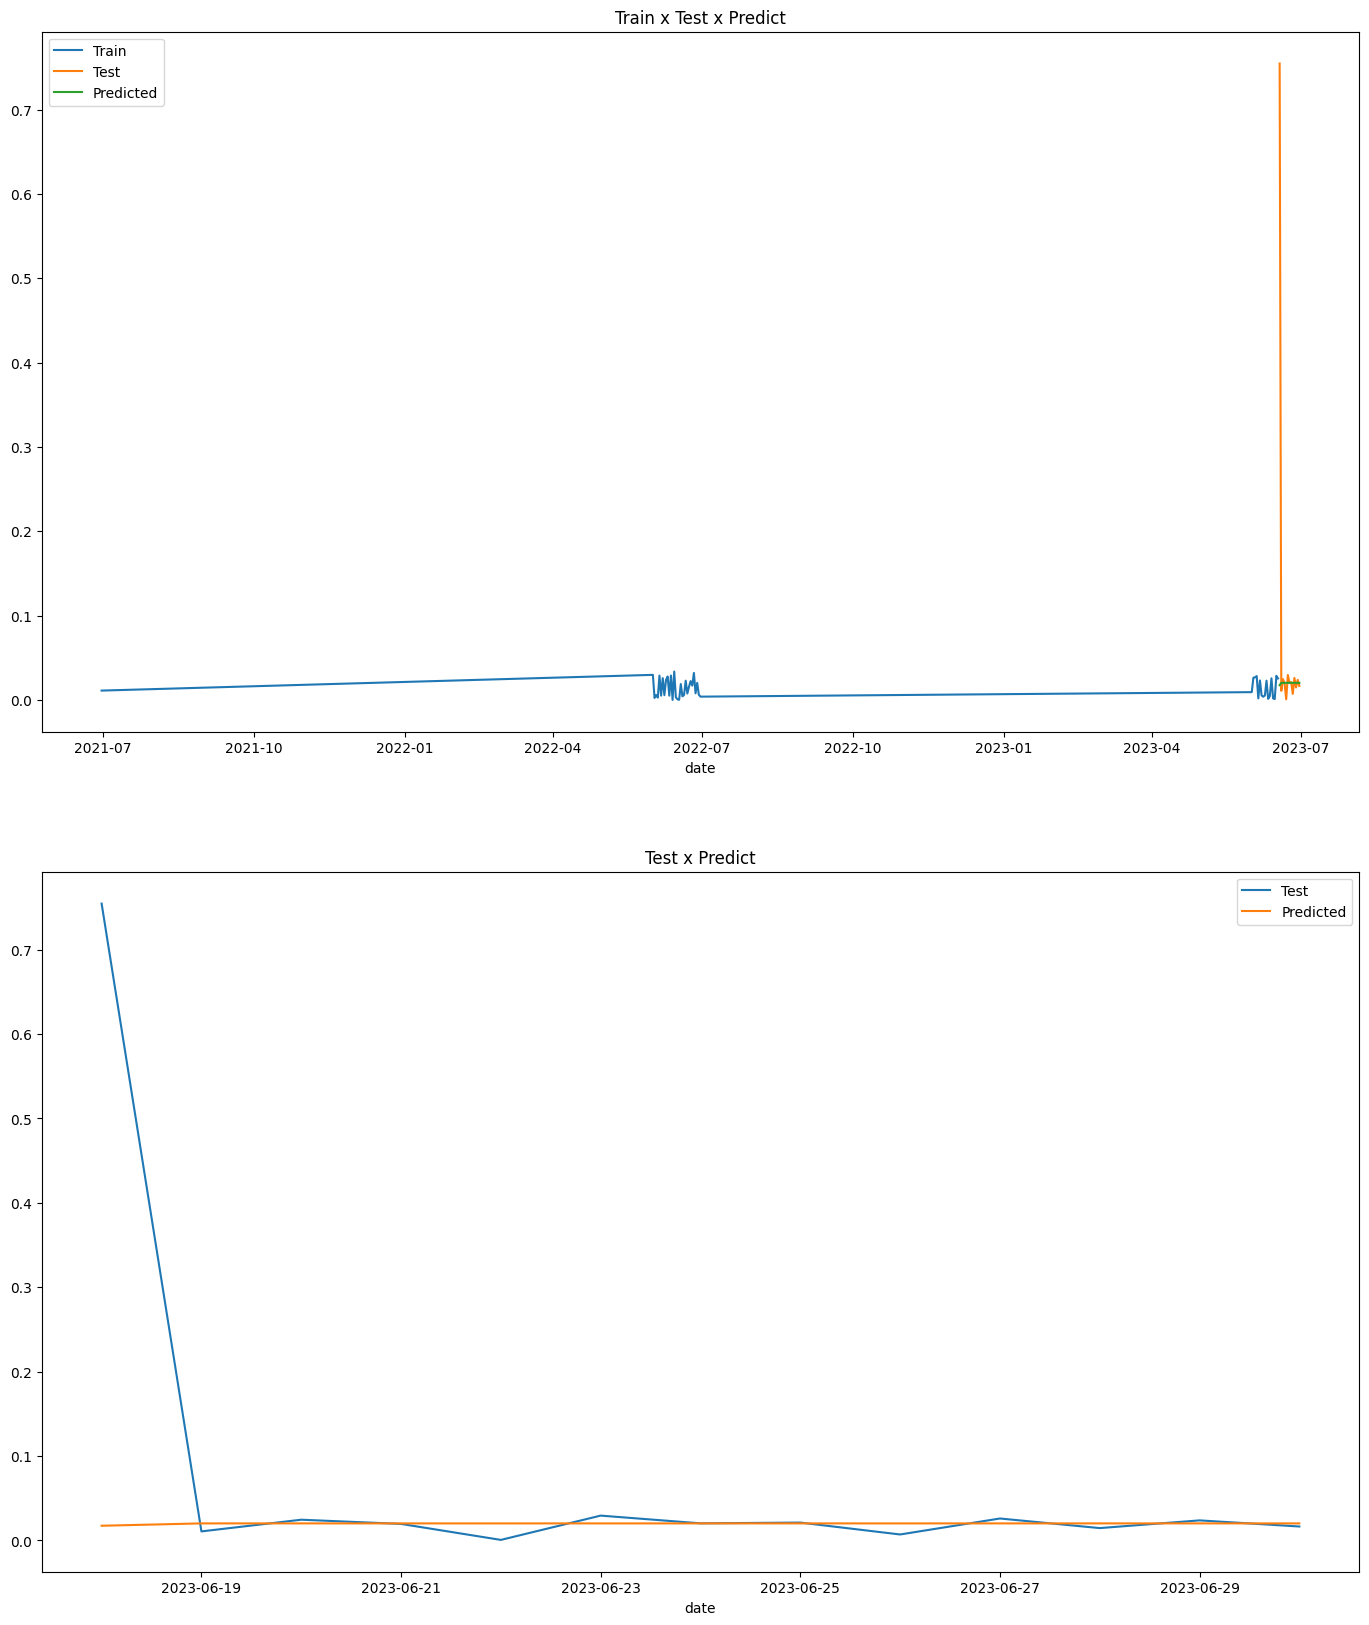

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)
print("훈련 레이블 형태:", y_train.shape)
print("테스트 레이블 형태:", y_test.shape)

# GRU 모델 구축
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_gru.add(Dense(y_train.shape[1]))  # 출력 레이어

model_gru.compile(optimizer='adam', loss='mse')

# 모델 훈련
history = model_gru.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

# 예측 결과 생성
y_predicted = model_gru.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4e}')
print(f'Mean Absolute Error: {mae:.4e}')
print(f'Root Mean Squared Error: {rmse:.4e}')

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17, 20))

    # 날짜와 데이터 인덱스 맞추기
    train_dates = x_date[window:len(y_train) + window]
    test_dates = x_date[len(y_train) + window:]

    g1 = grid.add_subplot(2, 1, 1)
    g2 = grid.add_subplot(2, 1, 2)

    sns.lineplot(x=train_dates, y=y_train[:, 0], label='Train', ax=g1)
    sns.lineplot(x=test_dates, y=y_test[:, 0], label='Test', ax=g1)
    sns.lineplot(x=test_dates, y=y_predicted[:, 0], label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=test_dates, y=y_test[:, 0], label='Test', ax=g2)
    sns.lineplot(x=test_dates, y=y_predicted[:, 0], label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

# 예측 결과 시각화
results_chart(y_predicted, y_test, y_train, x_date, SEQ_LENGTH - 1)


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)
훈련 레이블 형태: (48, 19153)
테스트 레이블 형태: (13, 19153)
피쳐 수: 19153
Mean Squared Error: 4.6685e-02
Mean Absolute Error: 1.4378e-01
Root Mean Squared Error: 2.1607e-01


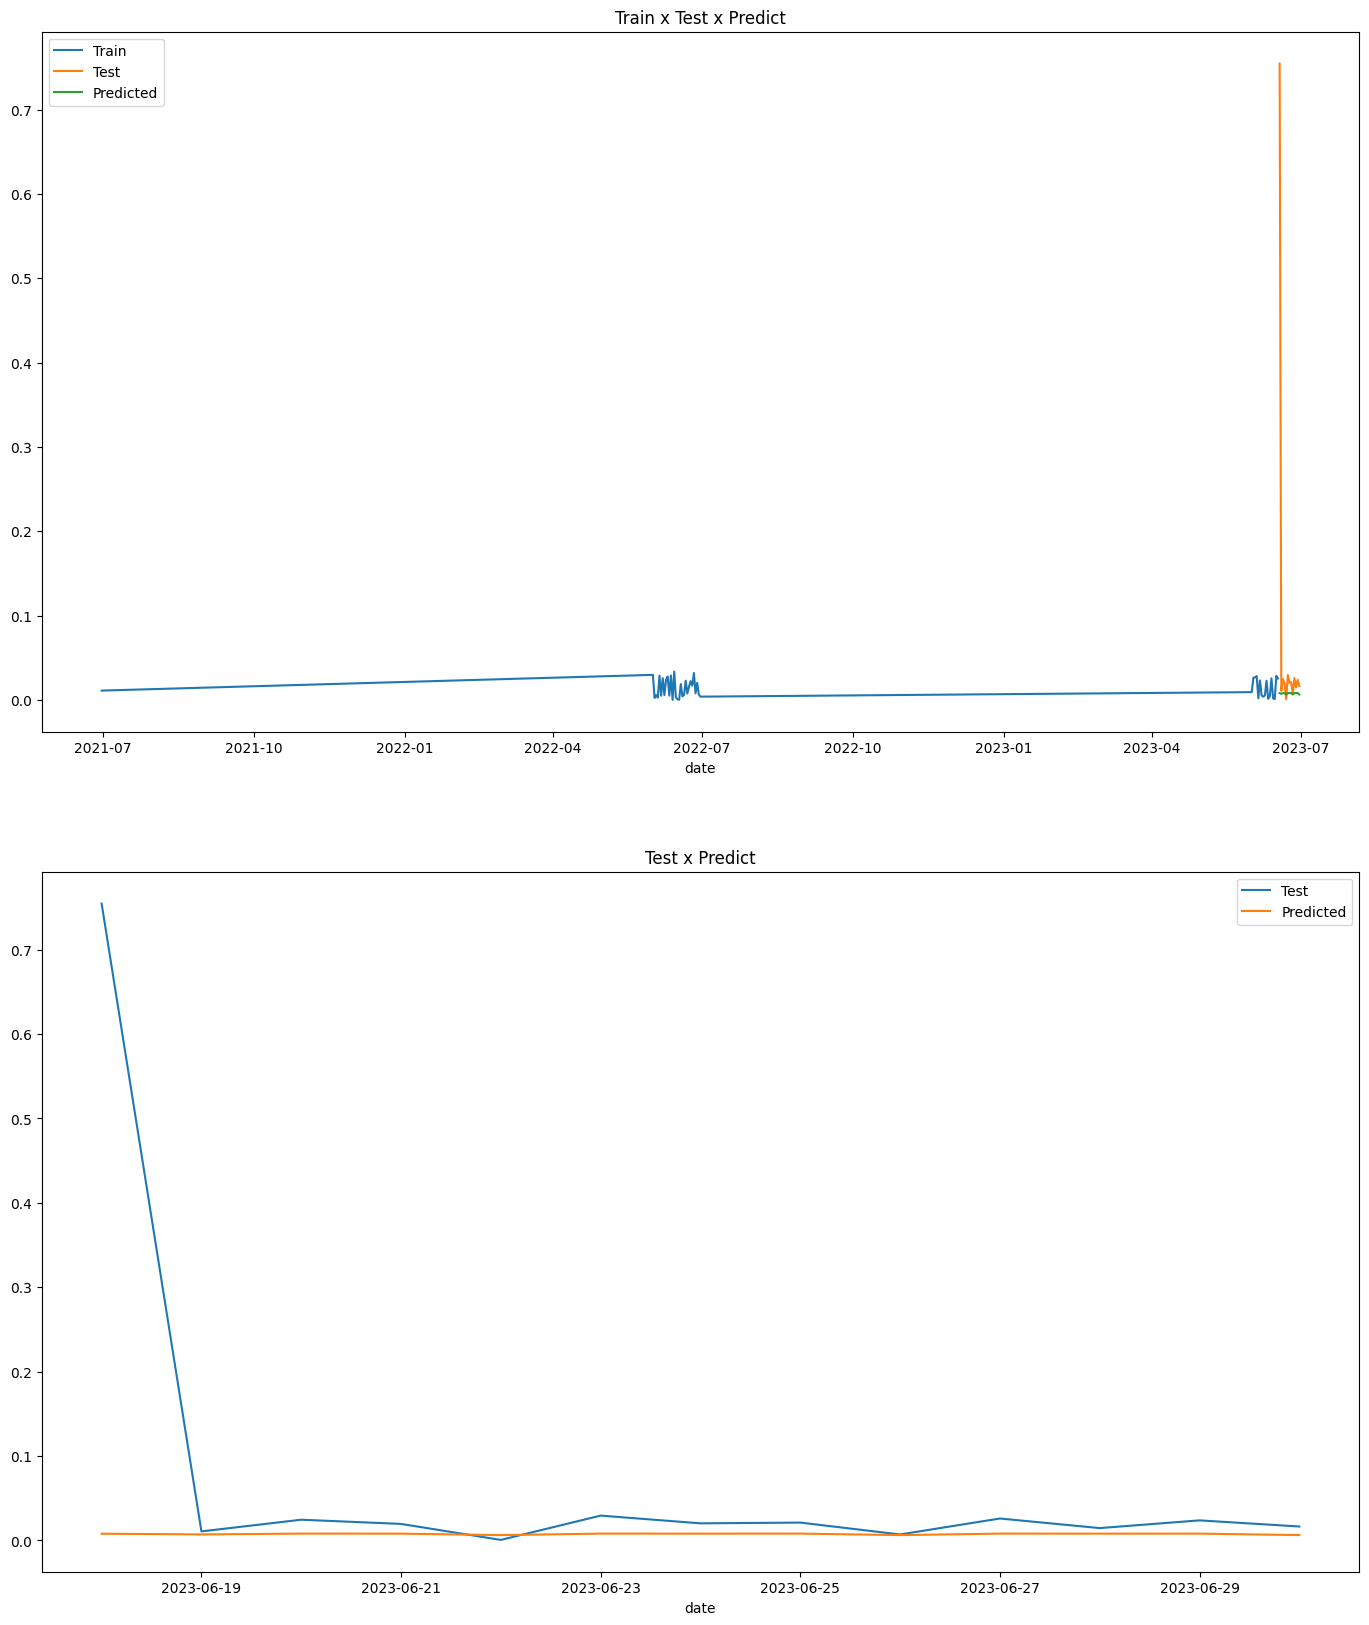

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)
print("훈련 레이블 형태:", y_train.shape)
print("테스트 레이블 형태:", y_test.shape)

# 피쳐 수 및 데이터 형태 확인
num_features = X_train.shape[2]  # 피쳐 수
print(f'피쳐 수: {num_features}')

# 모델 결과를 저장할 리스트
y_predicted_all_features = []
y_test_all_features = []

for feature_idx in range(num_features):
    # 훈련 및 테스트 데이터 변환
    X_train_reshaped = X_train[:, :, feature_idx].reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test[:, :, feature_idx].reshape(X_test.shape[0], -1)

    y_train_reshaped = y_train[:, feature_idx]
    y_test_reshaped = y_test[:, feature_idx]

    # SGDRegressor 모델 정의 및 훈련
    model_sdgr = SGDRegressor(max_iter=1000, tol=1e-3)
    model_sdgr.fit(X_train_reshaped, y_train_reshaped)

    # 예측 결과 생성
    y_predicted = model_sdgr.predict(X_test_reshaped)

    # 결과 저장
    y_predicted_all_features.append(y_predicted)
    y_test_all_features.append(y_test_reshaped)

# 평가 지표 계산
y_predicted_all_features = np.array(y_predicted_all_features).T
y_test_all_features = np.array(y_test_all_features).T

mse = mean_squared_error(np.hstack(y_test_all_features), np.hstack(y_predicted_all_features))
mae = mean_absolute_error(np.hstack(y_test_all_features), np.hstack(y_predicted_all_features))
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4e}')
print(f'Mean Absolute Error: {mae:.4e}')
print(f'Root Mean Squared Error: {rmse:.4e}')

# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17, 20))

    # 날짜와 데이터 인덱스 맞추기
    train_dates = x_date[window:len(y_train) + window]
    test_dates = x_date[len(y_train) + window:]

    g1 = grid.add_subplot(2, 1, 1)
    g2 = grid.add_subplot(2, 1, 2)

    sns.lineplot(x=train_dates, y=y_train[:, 0], label='Train', ax=g1)
    sns.lineplot(x=test_dates, y=y_test[:, 0], label='Test', ax=g1)
    sns.lineplot(x=test_dates, y=y_predicted[:, 0], label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=test_dates, y=y_test[:, 0], label='Test', ax=g2)
    sns.lineplot(x=test_dates, y=y_predicted[:, 0], label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

# 예측 결과 시각화
results_chart(y_predicted_all_features, y_test_all_features, y_train, x_date, SEQ_LENGTH - 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# 데이터 로드 및 전처리
data_filled = pd.read_csv('/content/merged_population_data_filled.csv', index_col=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)

# 데이터 개수 확인
num_samples = len(scaled_data)
print("데이터 개수:", num_samples)

# 시퀀스 길이 설정 (데이터 개수보다 작은 값으로 설정)
SEQ_LENGTH = min(30, num_samples)  # 예: 30일로 시퀀스 길이 설정

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
sequences = create_sequences(scaled_data, SEQ_LENGTH)

# 입력과 출력 데이터 준비
X = sequences[:, :-1]  # 시퀀스의 마지막 값을 제외한 부분
y = sequences[:, -1]   # 시퀀스의 마지막 값

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)


데이터 개수: 90
훈련 데이터 형태: (48, 29, 19153)
테스트 데이터 형태: (13, 29, 19153)


In [ ]:

# 데이터를 2차원 배열로 변환
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# 선형 회귀 모델 정의 및 훈련
model_linear_reg = LinearRegression().fit(X_train_reshaped, y_train)

# 예측 결과 생성
y_predicted = model_linear_reg.predict(X_test_reshaped)

# 평가 지표 계산 (스케일된 상태에서)
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

In [ ]:
# 날짜 데이터 (인덱스에서 가져오기)
x_date = pd.to_datetime(data_filled.index)

# 예측 결과 시각화 함수
def results_chart(y_predicted, y_test, y_train, x_date, window):
    grid = plt.figure(figsize=(17,20))

    g1 = grid.add_subplot(2,1,1)
    g2 = grid.add_subplot(2,1,2)

    sns.lineplot(x=x_date[window:len(y_train) + window], y=y_train[:,0], label='Train', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:,0], label='Test', ax=g1)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted[:,0], label='Predicted', ax=g1)
    g1.set_title('Train x Test x Predict')

    sns.lineplot(x=x_date[len(y_train) + window:], y=y_test[:,0], label='Test', ax=g2)
    sns.lineplot(x=x_date[len(y_train) + window:], y=y_predicted[:,0], label='Predicted', ax=g2)
    g2.set_title('Test x Predict')

    plt.show()

<ipython-input-22-e7cfa9b7d7f7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Squared Error', data=df, ax=axes[0], palette='viridis')
<ipython-input-22-e7cfa9b7d7f7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Absolute Error', data=df, ax=axes[1], palette='viridis')
<ipython-input-22-e7cfa9b7d7f7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Root Mean Squared Error', data=df, ax=axes[2], palette='viridis')


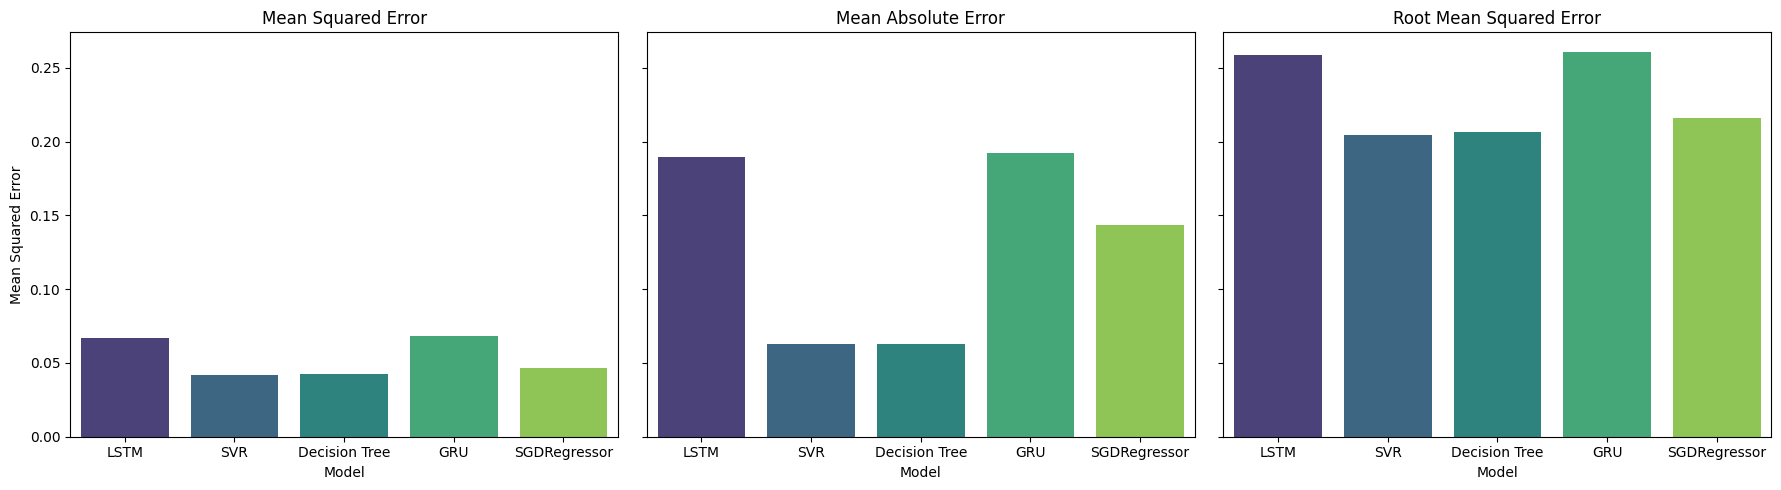

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 예측 결과 및 성과 지표
data = {
    'Model': ['LSTM', 'SVR', 'Decision Tree', 'GRU', 'SGDRegressor'],
    'Mean Squared Error': [6.6803e-02, 4.1900e-02, 4.2788e-02, 6.8129e-02, 4.6685e-02],
    'Mean Absolute Error': [1.8975e-01, 6.3000e-02, 6.2588e-02, 1.9236e-01, 1.4378e-01],
    'Root Mean Squared Error': [2.5846e-01, 2.0470e-01, 2.0685e-01, 2.6101e-01, 2.1607e-01]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 모델 성과 지표 시각화 함수
def plot_metrics(df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # MSE 시각화
    sns.barplot(x='Model', y='Mean Squared Error', data=df, ax=axes[0], palette='viridis')
    axes[0].set_title('Mean Squared Error')

    # MAE 시각화
    sns.barplot(x='Model', y='Mean Absolute Error', data=df, ax=axes[1], palette='viridis')
    axes[1].set_title('Mean Absolute Error')

    # RMSE 시각화
    sns.barplot(x='Model', y='Root Mean Squared Error', data=df, ax=axes[2], palette='viridis')
    axes[2].set_title('Root Mean Squared Error')

    plt.tight_layout()
    plt.show()

# 성과 지표 시각화 호출
plot_metrics(df)
